In [91]:
import matplotlib as mpl

fsize = 12
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (6,5)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import mpmath as mp

from scipy.special import legendre
from scipy.special import roots_legendre
from math import atan2

Potenical efectivo entre dos particulas $\alpha$

$V^{eff}(r) = V_C(r)+\bar{V}(r)+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2}$

$V_C(r) = \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{r} \text{, for } r\geq R_C \approx R_P+R_T =2R_\alpha$

$~~~~~~~~~~~= \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{2R_C}\left(3-\frac{r^2}{R_C^2}\right) \text{, for } r < R_C$

$\bar{V}(r) = -V_0e^{-r^2/\bar{R}^2}$

865.6128042497544


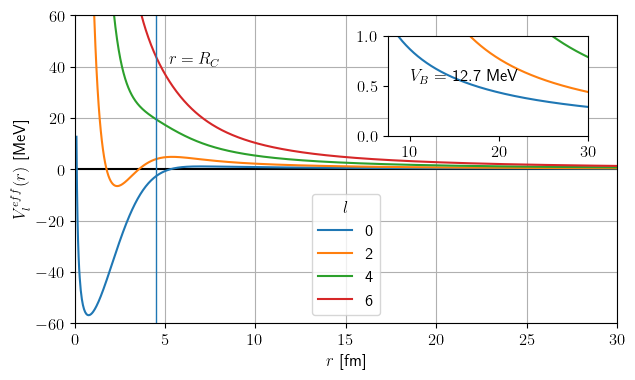

In [92]:
m_a_c2 = 3727.3794066 #MeV
m_p_c2 = 938.27208816 #MeV
m_12C_c2 = 12*931.49410242 #MeV

#mu_c2 = m_a_c2*m_a_c2/(m_a_c2+m_a_c2) #MeV
mu_c2 = m_p_c2*m_12C_c2/(m_p_c2+m_12C_c2) #MeV
print(mu_c2)

hbar_c = 197.3269804 #MeV fm

mN = 931.49410372
#hb2_2mu = (hbar_c**2)/(2*mu_c2)
a1 = 1
a2 = 12
hb2_2mu = (20.736*(a1+a2))/(a1*a2)

R_C = 4.5 #fm == R_bar
V_0 = 60 #MeV

e2_4pie0 = 1.44 #MeV fm

#N = 15 #Rep prog phys 73 (2010) 036301 12C+p
#a = 8 #Rep prog phys 73 (2010) 036301 12C+p

N = 15
a = 8

hb2_2mua2 = hb2_2mu/(a**2)

def V_C(x):
    return 6*e2_4pie0/x #Rep prog phys 73 (2010) 036301 (4.14) 12C+p
    #if x>R_C:
    #    return 4*e2_4pie0/x
    #else:
    #    return e2_4pie0*(2/R_C)*(3-(x/R_C)**2)
    
def V_bar(x):
    return -73.8*np.exp(-(x/2.7)**2) #Rep prog phys 73 (2010) 036301 (4.14) 12C+p
    #return -V_0*np.exp(-(x/R_C)**2)

def V_eff(x, l):
    return V_C(x) + V_bar(x) + hb2_2mu*l*(l+1)/(x**2)

x = np.linspace(0.1, 30, 1000)

l_list = np.arange(0, 7, 2)
#l_list = [1]

fig, ax = plt.subplots(1,1, figsize=(7,4))

ax.axhline(y=0, color='k')

axins = inset_axes(ax, 2, 1, loc=1, bbox_to_anchor=(0.87, 0.85), bbox_transform=ax.figure.transFigure)

for l_id, l in enumerate(l_list):
    V_eff_values = np.vectorize(V_eff)(x, l)
    #V_eff_values = VL_efectivo(x, R_val0, R_val0, V0_0, l, mu_c2)

    ax.plot(x, V_eff_values, label=str(l))
    axins.plot(x, V_eff_values)

    if l==0:
        index_max = np.argmax(V_eff_values)
        max_x = x[index_max]
        max_y = V_eff_values[index_max]
        axins.axvline(x=max_x, ymin=0, ymax=max_y)
        axins.text(x=10, y=0.55, s=r'$V_B=$ '+str(round(max_y,2))+' MeV')

ax.axvline(x=R_C, ymin=-60, ymax=60, lw=1)
ax.text(x=R_C+0.7, y=41, s=r'$r=R_C$')

ax.set_xlabel(r'$r$ [fm]')
ax.set_ylabel(r'$V^{eff}_l(r)$ [MeV]')

ax.legend(title=r"$l$", loc='lower center')

ax.grid()

ax.set_xlim(0,30)
ax.set_ylim(-60,60)

# sub region of the original image
x1, x2, y1, y2 = 7.5, 30, 0, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#plt.yscale(value='log')

plt.savefig('V_l_eff.pdf', bbox_inches='tight')

funciones de Lagrange-Legendre

$\phi_i(r)=(-1)^{N+i}\left(\frac{r}{ax_i}\right)^n\sqrt{ax_i(1-x_i)}\frac{P_N(2r/a-1)}{r-ax_i}$

pagina 43: elementos de matriz cinética 

$\bra{\phi_i}T_0+L(0)\ket{\phi_i}=\frac{(4N^2+4N+3)x_i(1-x_i)-6x_i+1}{3a^2x_i^2(1-x_i)^2}$

$\bra{\phi_i}T_0+L(0)\ket{\phi_j}=\frac{(-1)^{i+j}}{a^2[x_ix_j(1-x_i)(1-x_j)]^{1/2}}\left[N^2+N+1+\frac{x_i+x_j-2x_ix_j}{(x_i-x_k)^2}-\frac{1}{1-x_i}-\frac{1}{1-x_j}\right]$

[0.00600374 0.0313633  0.07589671 0.13779113 0.21451391 0.30292433
 0.39940295 0.5        0.60059705 0.69707567 0.78548609 0.86220887
 0.92410329 0.9686367  0.99399626]


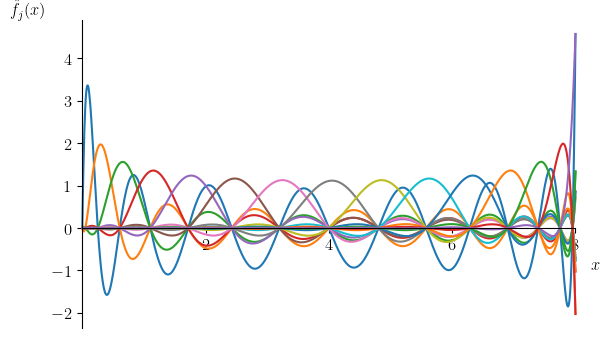

In [93]:
x = np.linspace(0, a, 1000)

#List of all Laguerre polynomial zeroes
Legendre_zeroes_plot = (roots_legendre(N)[0]+1)/2
print(Legendre_zeroes_plot)

def Lagrange_Legendre(x, x_j, j, N, a):
    return (-1)**(N-j) * (x/(a*x_j)) * np.sqrt(a*x_j*(1-x_j)) * (legendre(N)((2*x/a)-1) / (x - a*x_j))

f_N_plot = [Lagrange_Legendre(x, Legendre_zeroes_plot[i-1], i, N, a) for i in range(1,N+1)]

# print(roots_laguerre(4)[0])
fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(0, N):
    ax.plot(x, f_N_plot[i])

#ax.set_ylim(-1,1.5)
ax.set_ylabel(r'$\hat{f}_j(x)$', loc='top', rotation=0)
ax.set_xlabel(r'$x$', loc='right')

x_major = [a/4, a/2, 3*a/4, a]
ax.set_xticks(x_major)

# set the y-spine
ax.spines['left'].set_position('zero') # set left spine to y=0
ax.spines['right'].set_color('none') # turn off the right spine/ticks
ax.yaxis.tick_left()

# set the x-spine
ax.spines['bottom'].set_position('zero') # set bottom spine to x=0
ax.spines['top'].set_color('none') # turn off the top spine/ticks
ax.xaxis.tick_bottom()
ax.spines['bottom'].set_bounds((0, x_major[-1]))

plt.savefig('f_hat.pdf', bbox_inches='tight')

In [94]:
#construcción de la matriz C

def C_ij(i, j, l, N, a):
    Legendre_zeroes = (roots_legendre(N)[0]+1)/2
    x_i = Legendre_zeroes[i-1]

    T_L_ij = 0
    V_ij = 0

    if i==j:
        T_L_ij = (((2*N)**2+4*N+3.)*x_i*(1-x_i) - 6*x_i + 1)/(3*x_i**2 * (1-x_i)**2)
        V_ij = V_eff(a*x_i, l)
    else:
        x_j = Legendre_zeroes[j-1]
        A1 = ((-1)**(i+j))/np.sqrt(x_i*x_j*(1-x_i)*(1-x_j))
        A2 = N**2 + N + 1 + ((x_i+x_j-2*x_i*x_j)/(x_i-x_j)**2) - 1/(1-x_i) - 1/(1-x_j)
        T_L_ij = A1 * A2
    
    #print(i, j, hb2_2mua2*T_L_ij+V_ij)
    return hb2_2mua2*T_L_ij+V_ij

In [95]:
#construcción de R matriz

def Lagrange_Legendre_at_a(x_j, j, N, a):
    return (-1)**(N-j)/np.sqrt(a*x_j*(1-x_j))

def R_l(C_matrix, N, a):
    B = hb2_2mu/a

    C_inv = np.linalg.inv(C_matrix)
    #print("C_inv:")
    #for m in range(N):
    #    for n in range(N):
    #        print(m, n, C_inv[m][n])

    Legendre_zeroes = (roots_legendre(N)[0]+1)/2
    f_N = np.array([Lagrange_Legendre_at_a(Legendre_zeroes[i-1], i, N, a) for i in range(1,N+1)])
    #print("polinomios")
    #print(f_N)
    
    sum =  np.matmul(f_N, np.matmul(C_inv, f_N))

    return B*sum

eta = 0.19203608849863893


(-2.0, 2.0)

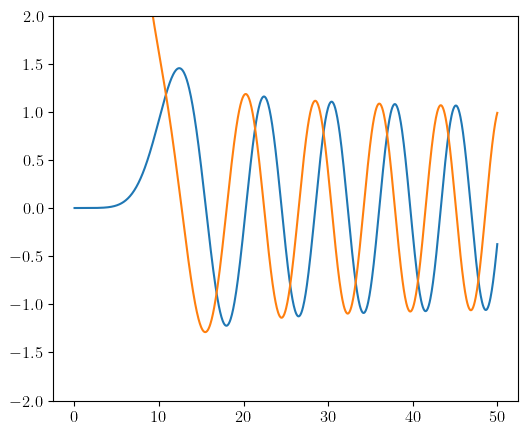

In [90]:
l = 0
Z_1 = 2 #Z_alpha
Z_2 = 2 #Z_alpha
e2 = 1.44 #MeV fm
mu_c2

E = 10

eta = (Z_1*Z_2*e2/hbar_c)*np.sqrt(mu_c2/(2*E))
print("eta =", eta)

F = np.vectorize(lambda x: mp.coulombf(0,5,x))
G = np.vectorize(lambda x: mp.coulombg(0,5,x))

x = np.linspace(0.01,50, 1000)
plt.plot(x, np.array([F(x), G(x)]).T)
plt.ylim(-2,2)

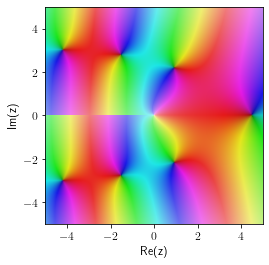

In [14]:

mp.cplot(lambda z: mp.coulombg(1,1,z), points=50000)

In [96]:
l = 0
Z_1 = 1 #Z_p
#Z_2 = 2 #Z_a
Z_2 = 6 #Z_12C
e2 = 1.44 #MeV fm

E_values = np.arange(0.01, 2.01, 0.01)
#print("Energy")
#print(E_values)

eta_values = (Z_1*Z_2*e2/hbar_c)*np.sqrt(mu_c2/(2*E_values))

S_l_values = [None]*len(E_values)

N_values = [7, 10]
d_l_values = [None]*len(N_values)

for N_id, N_val in enumerate(N_values):

    #define partial C-matrix
    #print("Hamiltonian")
    C_matrix = np.zeros((N_val,N_val))
    for m in range(1, N_val+1):
        C_matrix[m-1] = np.array([C_ij(m, n, l, N_val, a) for n in range(1, N_val+1)])

    for E_id, E_val in enumerate(E_values):

        C_draft = C_matrix #make a copy of C-matrix

        C_draft = C_draft-E_val*np.eye(N_val) #subtract E from partial C-matrix copy
        #print("C:")
        #for m in range(N):
        #    for n in range(N):
        #        print(m, n, C_draft[m][n])

        #define Coulomb functions
        F = np.vectorize(lambda r: mp.coulombf(l,eta_values[E_id],r))
        G = np.vectorize(lambda r: mp.coulombg(l,eta_values[E_id],r))

        #define coulomb hanckel functions
        def H_l_minus(rho):
            return G(rho) - 1j*F(rho)

        def H_l_plus(rho):
            return G(rho) + 1j*F(rho)

        #define scattering matrix
        def S_l(E, N, a):

            k = np.sqrt(2*mu_c2*E)/hbar_c
            rho = k*a

            R_matrix = R_l(C_draft, N, a)
            #print("R_matrix")
            #print(R_matrix)

            numerator = -(rho*R_matrix*mp.diff(H_l_minus, rho) - H_l_minus(rho))
            denominator = rho*R_matrix*mp.diff(H_l_plus, rho) - H_l_plus(rho)

            return numerator/denominator

        S_l_values[E_id] = S_l(E_val, N_val, a)
        
    d_l_values[N_id] = np.array([atan2(s.imag, s.real)/2 for s in S_l_values])

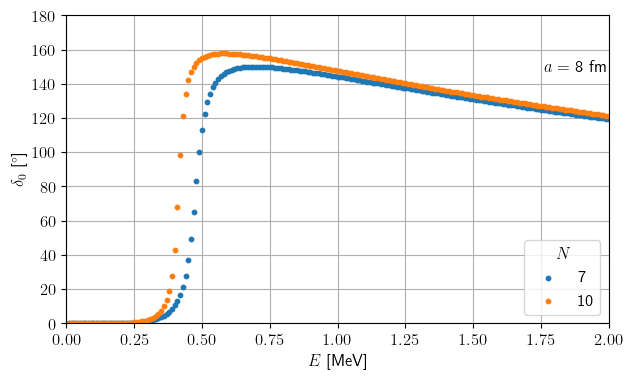

In [97]:

new_dl = 180*(np.array(d_l_values)+np.pi/2)/np.pi

fig, ax = plt.subplots(1,1, figsize=(7,4))

for n in range(len(new_dl)):
    plt.scatter(E_values, new_dl[n], label=N_values[n], s=10, zorder=2)

ax.set_xlabel(r'$E$ [MeV]')
ax.set_ylabel(r'$\delta_0$ [$^\circ$]')

ax.text(x=1.76, y=147, s=r'$a=$ '+str(a)+" fm")

ax.grid(zorder=1)
ax.set_xlim(0,2)
ax.set_ylim(0,180)

ax.legend(title=r"$N$", loc='lower right')

plt.savefig('R_matrix_phase_shift.pdf', bbox_inches='tight')